# Proyecto 1, Modelos de Gestión Financiera
## Sebastian Puerto
## 25 de septiembre de 2019

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [16]:
def grafico_valor_activo(S0 = 100, mu = 0.02, sig = 0.07, dt = 0.001, Dt = 1, N = 10, graficar = True, pts = 0, txtad = ""):
    tf = N*Dt + dt
    ts = np.arange(0, tf, dt)
    dws = np.array([np.random.normal(0, np.sqrt(dt)) for t in ts])
    
    Ss = np.zeros(len(ts))
    Ss[0] = S0
    
    # Calculo del valor de S para los tiempos t en ts
    for i in range(1, len(ts)):
        S = Ss[i-1]
        ti = ts[i]
        dS = S*(mu*dt + sig*dws[i-1])
        Ss[i] = S + dS 
    
    
    if not graficar:
        return ts, Ss
    
    figura = plt.figure(figsize = (8,5))
    plt.title("Valor Simulado del precio del Activo (S) con \n\
               $\mu=$" + str(mu) + ", $\sigma=$" + str(sig) + "\n" + txtad)

    plt.xlabel("Tiempo $t$")
    plt.ylabel("Precio $S$/$\n % de incremento respecto al precio inicial $S_0 = 100$")
    
    if pts == 0:
        plt.plot(ts, Ss)
        plt.show()
        return ts, Ss
    
    plotis = np.arange(0, pts)*(len(ts) - 1)//(pts - 1)
    plotTs = np.zeros(len(plotis))
    plotSs = np.zeros(len(plotis))
    
    for j in range(len(plotis)):
        i = plotis[j]
        plotTs[j] = ts[i]
        plotSs[j] = Ss[i]
    
    plt.plot(plotTs, plotSs)
    plt.show()
    
    return ts, Ss

In [3]:
def est_precis(ddt, mmu = 0.9, Ene = 48):
    start = time.time()
    ts, Ss = grafico_valor_activo(S0 = 1, mu = mmu, sig = 0, dt = ddt, Dt = 3, N = Ene, graficar = False)
    t = ts[-1]
    exCalc = Ss[-1]
    exReal = np.exp(mmu*t)
    error = np.abs(exCalc/exReal - 1)
    print("Para dt =", ddt, ", e**(", mmu, t, ") calculado:\t", exCalc)
    print("Para dt =", ddt, ", e**(", mmu, t, ") real:\t", exReal)
    print("Asi que, para dt =", ddt, " hubo un error de:", error*100, "%")
    print("Tiempo: ", time.time() - start, "\n")
est_precis(ddt = 0.0001)
est_precis(ddt = 0.0005)
est_precis(ddt = 0.001)
est_precis(ddt = 0.01)

Para dt = 0.0001 , e**( 0.9 144.0 ) calculado:	 1.9143978647135023e+56
Para dt = 0.0001 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.0001  hubo un error de: 0.5814679037944637 %
Tiempo:  5.836003065109253 

Para dt = 0.0005 , e**( 0.9 144.0 ) calculado:	 1.8702713688723112e+56
Para dt = 0.0005 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.0005  hubo un error de: 2.8730455971999413 %
Tiempo:  1.1812915802001953 

Para dt = 0.001 , e**( 0.9 144.0 ) calculado:	 1.816569369920516e+56
Para dt = 0.001 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.001  hubo un error de: 5.661898429115553 %
Tiempo:  0.7289266586303711 

Para dt = 0.01 , e**( 0.9 144.0 ) calculado:	 1.0784345960075816e+56
Para dt = 0.01 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.01  hubo un error de: 43.99472206218555 %
Tiempo:  0.0632331371307373 



# $\mu=0.031$

## $\sigma = 0$

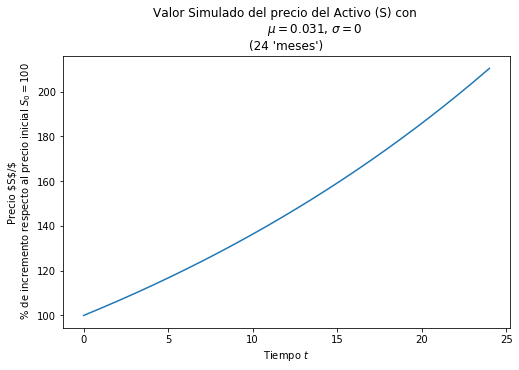

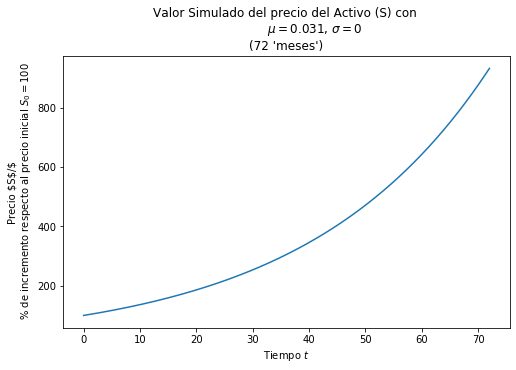

In [17]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 0.03$

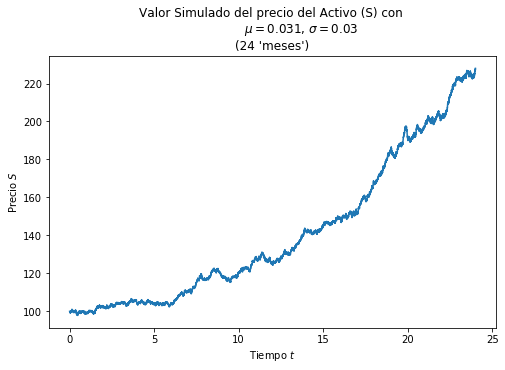

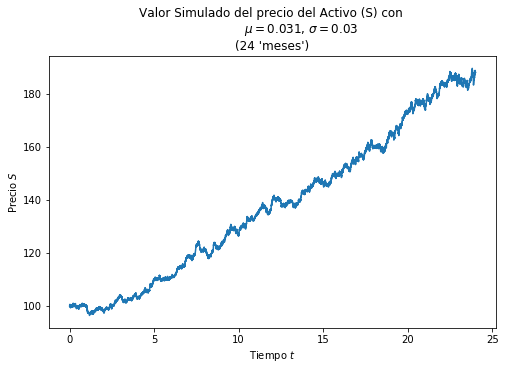

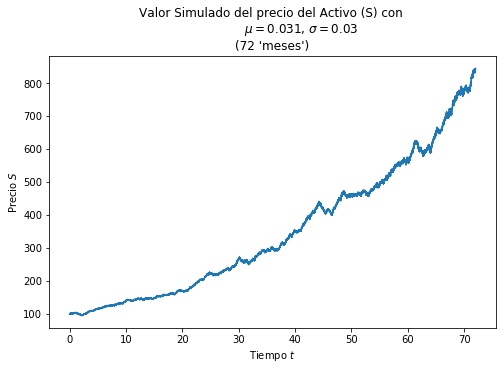

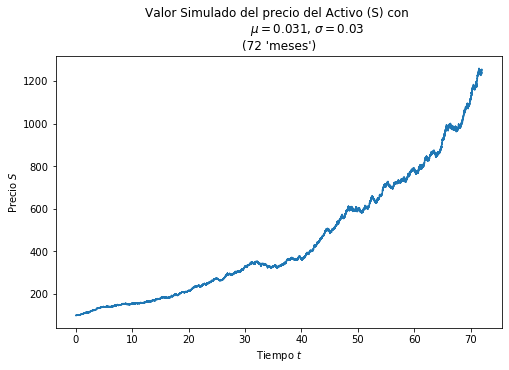

In [5]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 0.09$

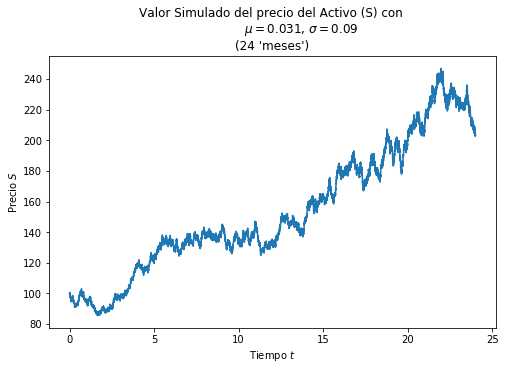

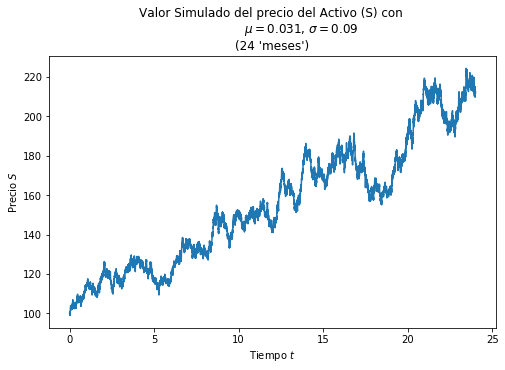

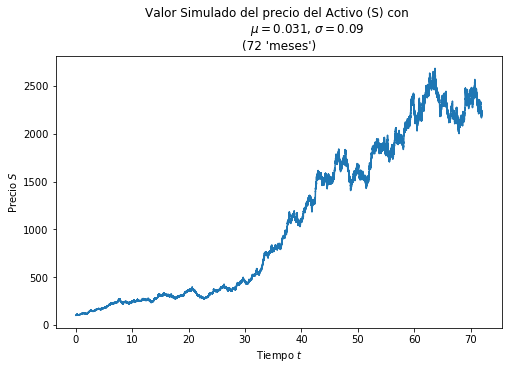

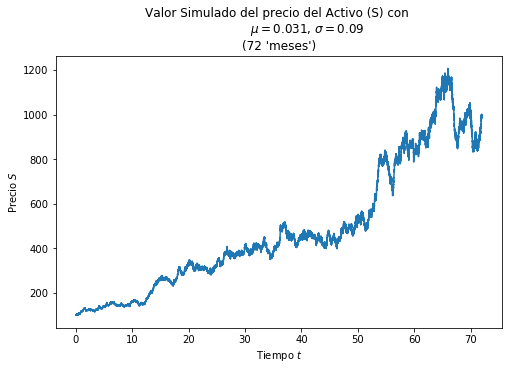

In [6]:
# Mes
# mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24, txtad = "(24 'meses')") 
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24*3, txtad = "(72 'meses')")


## $\sigma = 0.15$

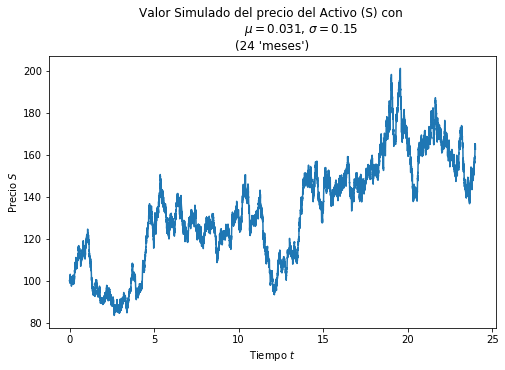

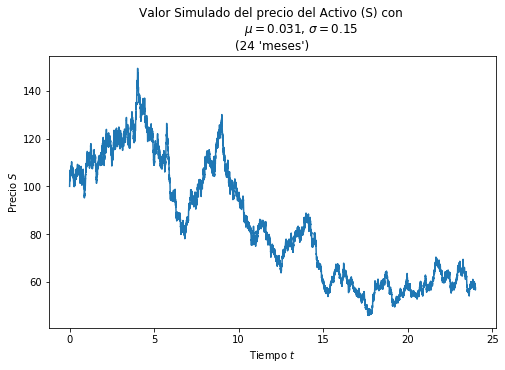

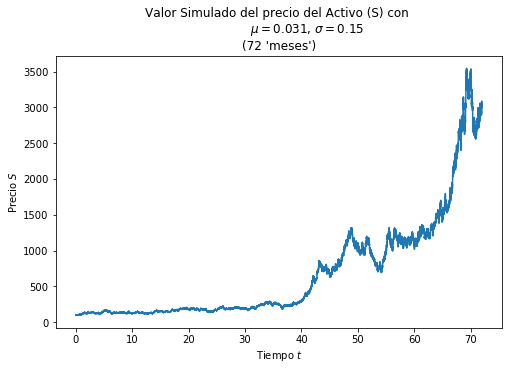

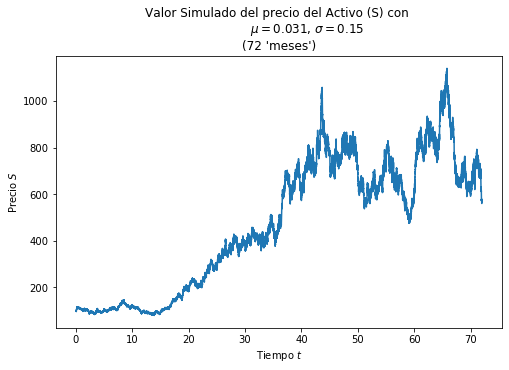

In [7]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 0.4$

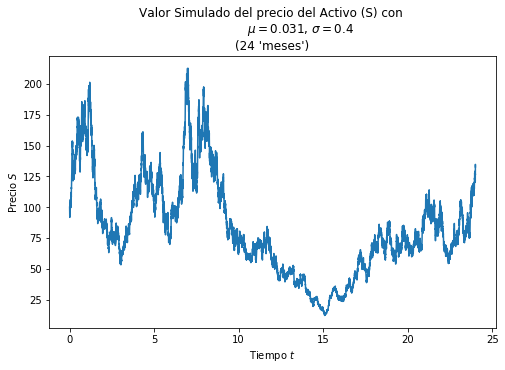

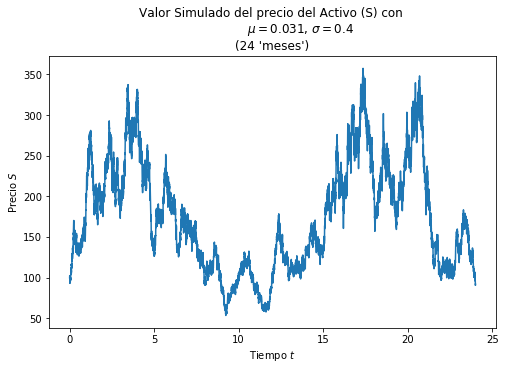

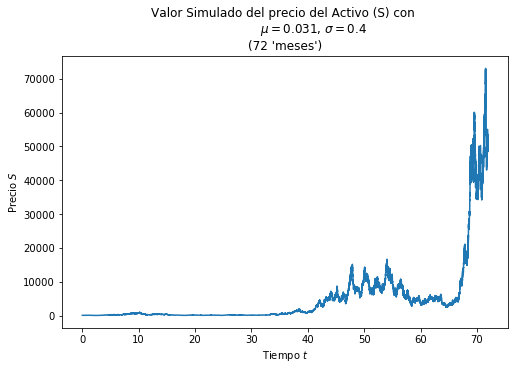

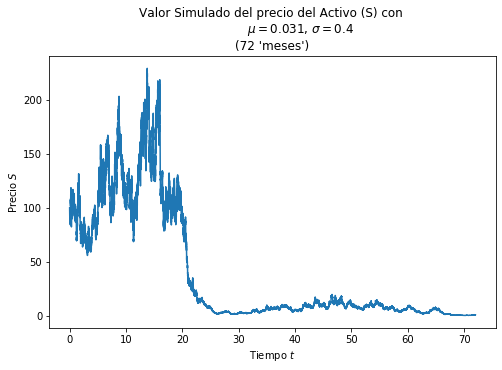

In [9]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 1$

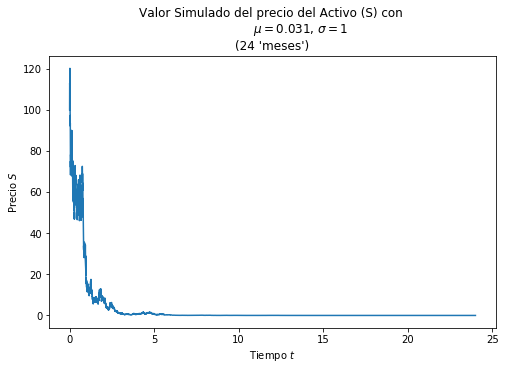

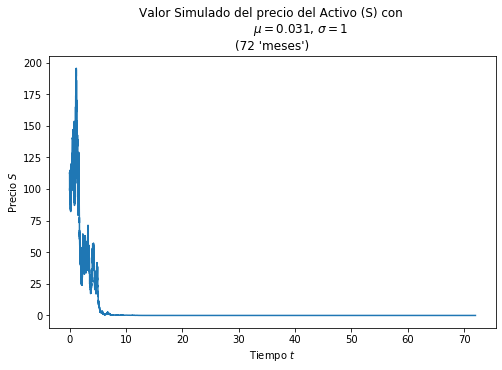

In [8]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 1, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 1, Dt = 1, N = 24*3, txtad = "(72 'meses')")